In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Retrive raw data
data = pd.read_csv("COVID-19BehaviorData_CAN_USA.csv")

In [3]:
# Data Cleaning 

# Convert text values into numeric values
data["i4_health"].replace(["No, they have not","Yes, and they tested negative","Not sure"," ","Yes, and they have not received their results from the test yet","Yes, and they tested positive"],['4','2','5','0','3','1'],inplace=True)
data["i3_health"].replace(["No, I have not","Yes, and I tested negative","Not sure"," ","Yes, and I have not received my results from the test yet","Yes, and I tested positive"],['4','2','5','0','3','1'],inplace=True)
data["i5_health_1"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
data["i5_health_2"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
data["i5_health_3"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
data["i5_health_4"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
data["i5_health_5"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
data["i5_health_99"].replace([" ","No","Yes"],["N/A",'0','1'],inplace=True)
data["i5a_health"].replace([" ","No","Yes","Not sure"],['N/A','2','1','99'],inplace=True)
data["i8_health"].replace([" ","No","Yes","Not sure"],['N/A','2','1','99'],inplace=True)
data["i6_health"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i7b_health"].replace([" ","No","Yes"],['N/A','2','1'],inplace=True)
data["i9_health"].replace([" ","No","Yes","Not sure"],['0','2','1','99'],inplace=True)
data["i10_health"].replace([" ","Very easy","Somewhat easy","Somewhat difficult","Neither easy nor difficult","Very difficult","Not sure"],['0','1','2','4',"3",'5','99'],inplace=True)
data["i11_health"].replace([" ","Very willing","Somewhat willing","Somewhat unwilling","Neither willing nor unwilling","Very unwilling","Not sure"],['0','1','2','4',"3",'5','99'],inplace=True)
data["i12_health_1"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_2"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_3"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_4"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_5"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_6"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_7"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_8"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_9"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_10"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_11"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_12"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_13"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_14"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_15"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_16"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_17"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_18"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_19"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i12_health_20"].replace([" ","Always","Frequently","Sometimes","Rarely","Not at all"],['N/A','1','2','3','4','5'],inplace=True)
data["i14_health_1"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_2"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_3"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_4"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_5"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_6"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_7"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_8"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_9"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_10"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_96"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_98"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["i14_health_99"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_1"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_2"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_3"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_4"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_5"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_6"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_7"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_8"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_9"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_10"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_11"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_12"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_13"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_98"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["d1_health_99"].replace([" ","No","Yes"],['N/A','0','1'],inplace=True)
data["gender"].replace([" ","Male","Female"],['N/A','1','2'],inplace=True)
data["household_size"].replace(["8 or more","Prefer not to say","Don't know"],['8','10','9'],inplace=True)
data["household_children"].replace(["5 or more","Prefer not to say","0","1","2","3","4","Don't know"],['6','8','1',"2",'3','4','5','0'],inplace=True)
data["employment_status"].replace(["Full time employment","Part time employment","Full time student","Retired","Unemployed","Not working","Other"],['1','2','3','4','5','6','7'],inplace=True)
data["qweek"].replace(["week 1","week 2","week 3","week 4","week 5","week 6","week 7","week 8","week 9","week 10","week 11","week 12","week 13","week 14","week 15","week 16","week 17","week 18","week 19","week 20","week 21", ],['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21'],inplace=True)
data.to_csv("cleaned.csv")

In [4]:
# Cleaned dataset - df
df = pd.read_csv("cleaned.csv", index_col=0)

# Raw dataset - df_raw
df_raw = pd.read_csv("COVID-19BehaviorData_CAN_USA.csv")
df_raw.rename(columns=lambda x: x+'_raw', inplace=True)

In [5]:
# Country column
df['Country'] = df['RecordNo'].str[0:3]
df_raw['country'] = df_raw['RecordNo_raw'].str[0:3]

In [6]:
# Scaling variables
min_max_scaler = MinMaxScaler()
df["age"] = min_max_scaler.fit_transform(df[["age"]])
df["i1_health"] = min_max_scaler.fit_transform(df[["i1_health"]])
df["i2_health"] = min_max_scaler.fit_transform(df[["i2_health"]])
df["i7a_health"] = min_max_scaler.fit_transform(df[["i7a_health"]])
df["i13_health"] = min_max_scaler.fit_transform(df[["i13_health"]])

In [7]:
# Redefine target variable based on if they avoided going out frequently or not
df["i12_health_6"].replace([1,2], 1, inplace=True)
df["i12_health_6"].replace([4,5,3], 0, inplace=True)

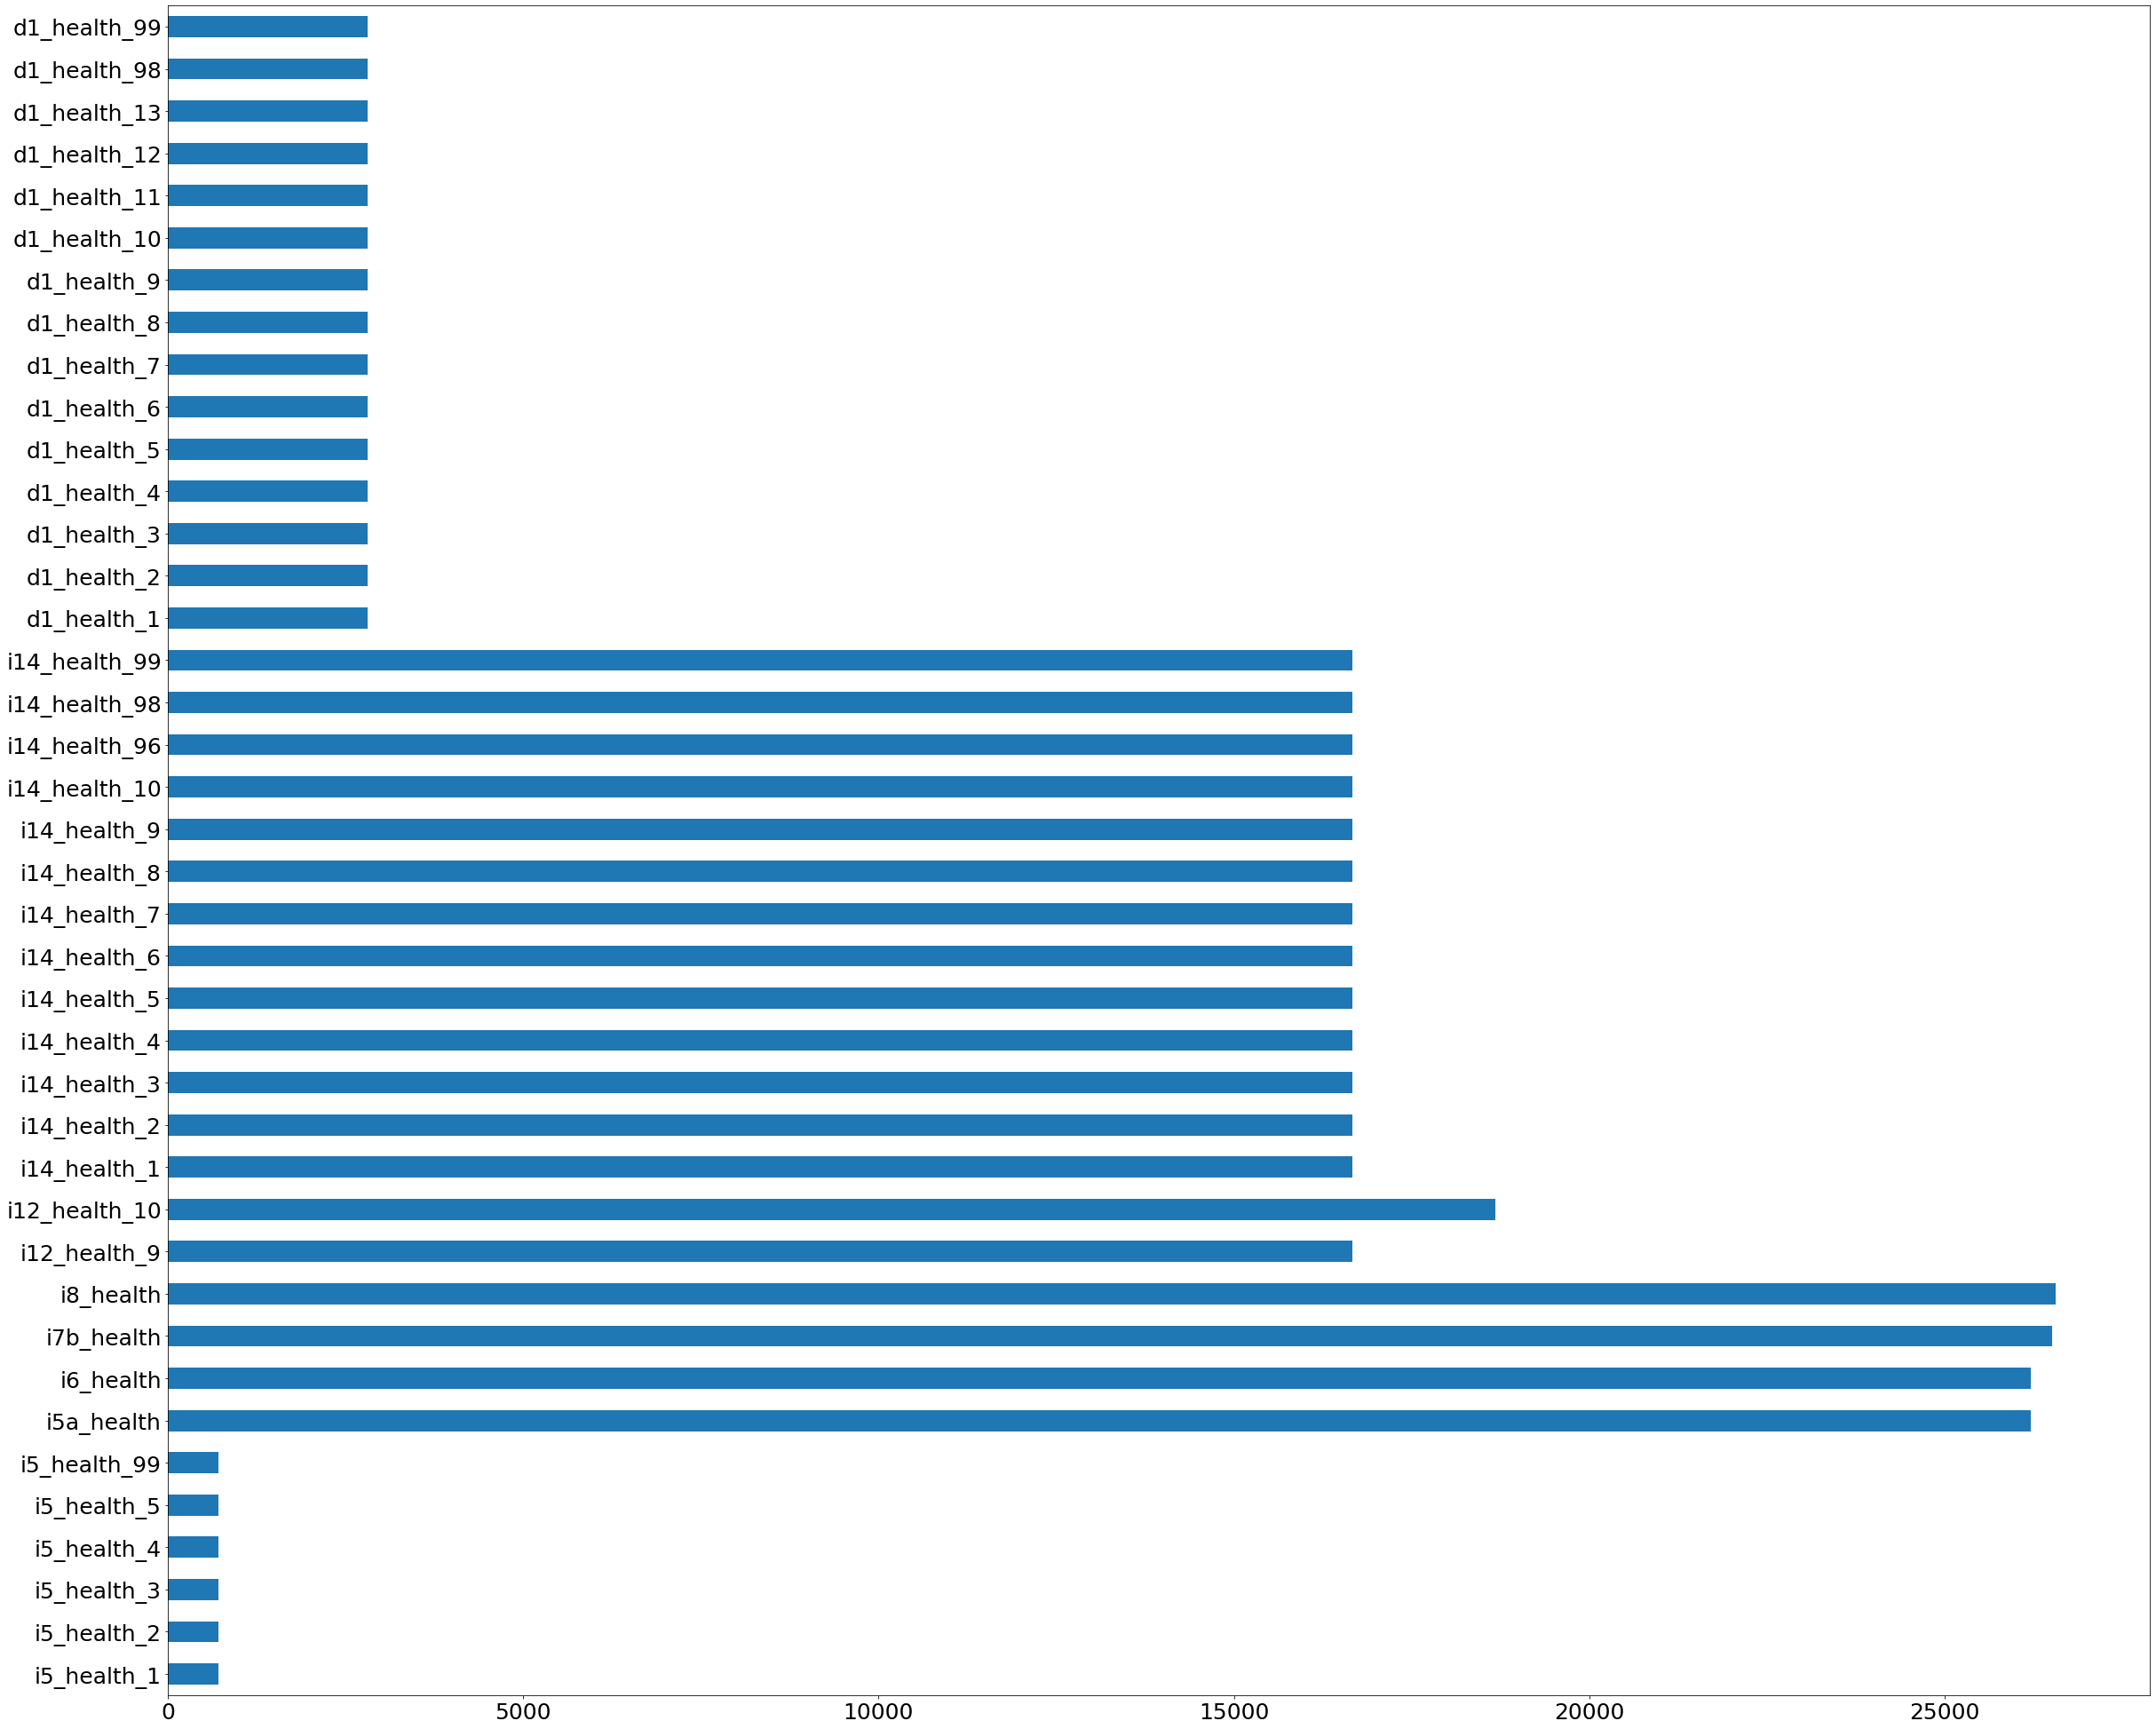

In [8]:
# Count missing values and plot the graph
check_missing = df.isnull()
count_missing = check_missing.apply(lambda x: x.value_counts())
with_missing = count_missing.loc[:, np.logical_not(count_missing.isna().any())]
with_missing.iloc[1,:].plot(kind='barh', figsize=(40, 35), width=0.5, fontsize=25)

In [9]:
# Percentage of missing values for each column
pd.set_option('display.max_rows', 100)
df.isnull().sum()/len(df)*100

Index                  0.000000
RecordNo               0.000000
endtime                0.000000
qweek                  0.000000
i1_health              0.000000
i2_health              0.000000
i7a_health             0.000000
i3_health              0.000000
i4_health              0.000000
i5_health_1            2.494363
i5_health_2            2.494363
i5_health_3            2.494363
i5_health_4            2.494363
i5_health_5            2.494363
i5_health_99           2.494363
i5a_health            90.959237
i6_health             90.959237
i7b_health            91.965308
i8_health             92.138768
i9_health              0.000000
i10_health             0.000000
i11_health             0.000000
i12_health_1           0.000000
i12_health_2           0.000000
i12_health_3           0.000000
i12_health_4           0.000000
i12_health_5           0.000000
i12_health_6           0.000000
i12_health_7           0.000000
i12_health_8           0.000000
i12_health_9          57.814397
i12_heal

In [10]:
# Keep variables that have acceptable missing rate
# Impute missing variables using Mode()
df['i11_health'].fillna(df['i11_health'].mode()[0], inplace=True)
df['i5_health_99'].fillna(df['i5_health_99'].mode()[0], inplace=True)
df['d1_health_98'].fillna(df['d1_health_98'].mode()[0], inplace=True)
df['d1_health_99'].fillna(df['d1_health_99'].mode()[0], inplace=True)

In [11]:
# Change data type
for i in range (7,41):
    df[df.columns[i]] = df[df.columns[i]].astype('category')
    
for i in range (43,72):
    df[df.columns[i]] = df[df.columns[i]].astype('category')
    
df[df.columns[73]] = df[df.columns[73]].astype('category')
df[df.columns[75]] = df[df.columns[75]].astype('category')
df[df.columns[76]] = df[df.columns[76]].astype('category')
df[df.columns[77]] = df[df.columns[77]].astype('category')
df[df.columns[78]] = df[df.columns[78]].astype('category')
       
df[df.columns[0]] = df[df.columns[0]].astype('O')
df[df.columns[1]] = df[df.columns[1]].astype('O')
df[df.columns[56]] = df[df.columns[56]].astype('O')

In [12]:
# Display data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28825 entries, 0 to 28824
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Index               28825 non-null  object  
 1   RecordNo            28825 non-null  object  
 2   endtime             28825 non-null  object  
 3   qweek               28825 non-null  int64   
 4   i1_health           28825 non-null  float64 
 5   i2_health           28825 non-null  float64 
 6   i7a_health          28825 non-null  float64 
 7   i3_health           28825 non-null  category
 8   i4_health           28825 non-null  category
 9   i5_health_1         28106 non-null  category
 10  i5_health_2         28106 non-null  category
 11  i5_health_3         28106 non-null  category
 12  i5_health_4         28106 non-null  category
 13  i5_health_5         28106 non-null  category
 14  i5_health_99        28825 non-null  category
 15  i5a_health          2606 non-null   

In [13]:
# EDA

In [14]:
# Full dataset - df_full
df_full = df.join(df_raw)

# Create dataset for USA and CAN separately for EDA
df_full['country'] = df_full['RecordNo'].str[0:3]
df_full_usa = df_full.loc[df_full['country'] == 'USA']
df_full_can = df_full.loc[df_full['country'] == 'CAN']

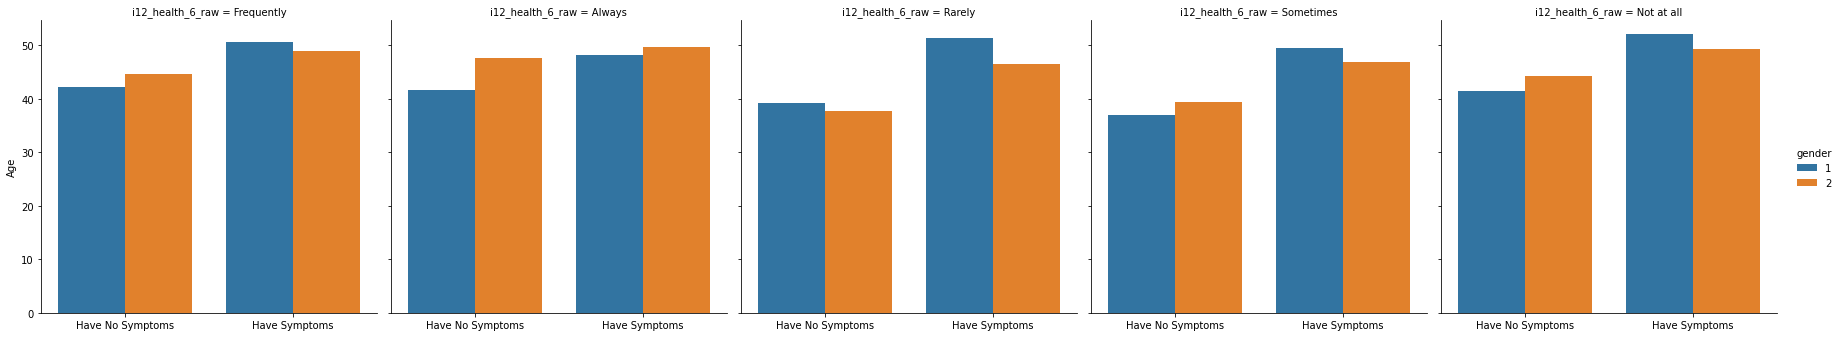

In [15]:
ax = sns.catplot(x="i5_health_99", y="age_raw", hue="gender", col="i12_health_6_raw", data=df_full, kind="bar", ci=None)
ax.set_axis_labels("", "Age")
ax.set_xticklabels(["Have No Symptoms", "Have Symptoms"])

[Text(0, 0, 'Male'), Text(0, 0, 'Female')]

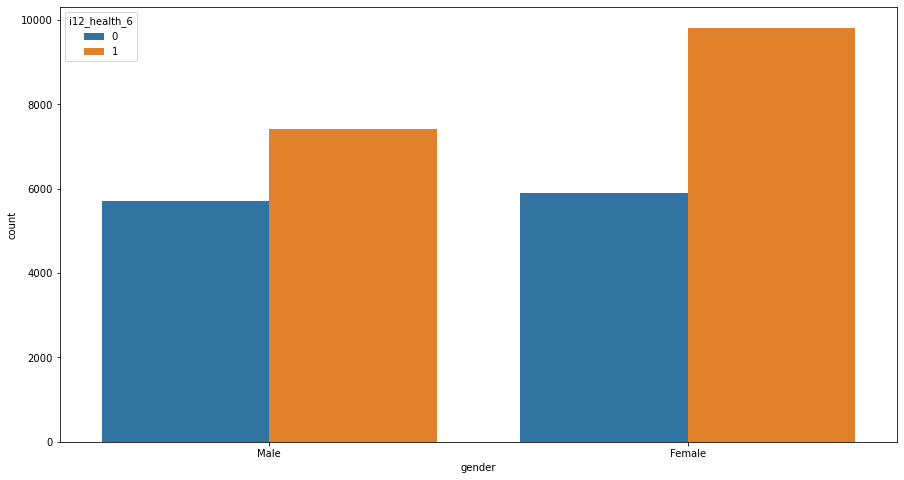

In [16]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="gender", hue="i12_health_6", data=df_full)
ax.set_xticklabels(["Male", "Female"])

Text(0.5, 0, 'Avoided going out in general')

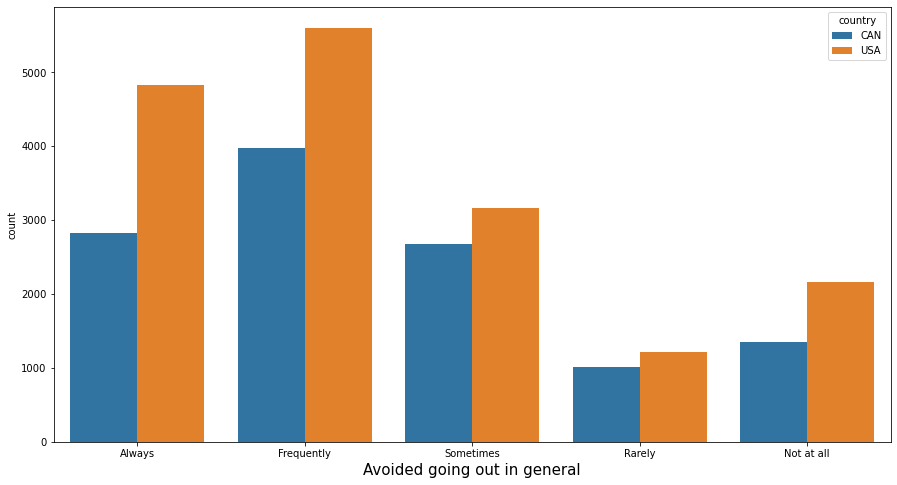

In [17]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="i12_health_6_raw", hue="country", data=df_full, order=["Always","Frequently","Sometimes","Rarely","Not at all"])
ax.set_xlabel("Avoided going out in general", fontsize=15)

In [18]:
i12_crosstab = pd.crosstab(df_full["i12_health_6_raw"], df_full["country"] ,margins=True)
i12_crosstab

country,CAN,USA,All
i12_health_6_raw,,,
Always,2831,4832,7663
Frequently,3970,5604,9574
Not at all,1346,2167,3513
Rarely,1018,1219,2237
Sometimes,2678,3160,5838
All,11843,16982,28825


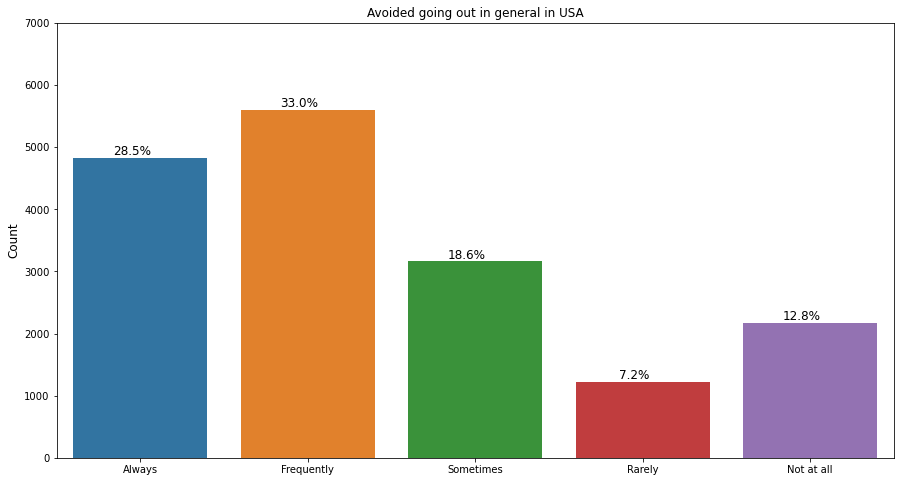

In [19]:
def without_hue(plot, feature, country):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12, ha='center', va='bottom')
    plt.xlabel(" ", size=12)
    plt.ylabel("Count", size=12)
    plt.ylim(0, 7000)
    plt.title("Avoided going out in general in " + country, size=12)
    plt.show()

plt.figure(figsize=(15,8))
ax = sns.countplot(x="i12_health_6_raw", data=df_full_usa, order=["Always","Frequently","Sometimes","Rarely","Not at all"])
without_hue(ax, df_full_usa.i12_health_6, df_full_usa["country"].unique()[0])

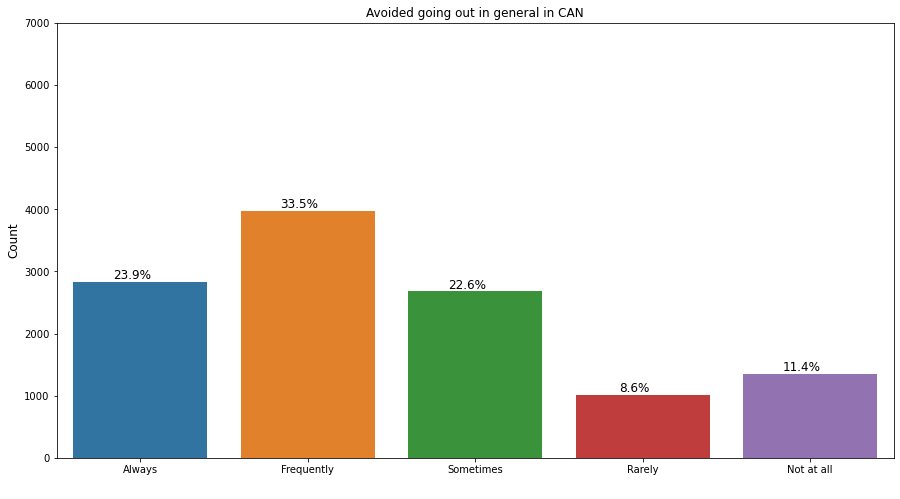

In [20]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="i12_health_6_raw", data=df_full_can, order=["Always","Frequently","Sometimes","Rarely","Not at all"])
without_hue(ax, df_full_can.i12_health_6, df_full_can["country"].unique()[0])

<ipython-input-22-1b6974fa4617>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["age_category"][i] = ">65"
<ipython-input-22-1b6974fa4617>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["age_category"][i] = "30-45"
<ipython-input-22-1b6974fa4617>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["age_category"][i] = "20-30"
<ipython-input-22-1b6974fa4617>:13: SettingWithCopyWarning: 
A value is trying to be set 

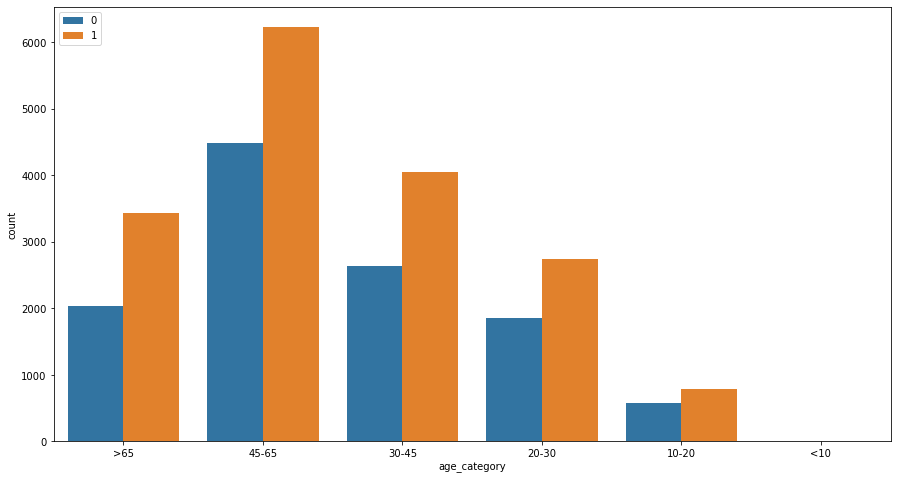

In [22]:
df_new = df_full.copy()
df_new['age_category'] = ""
for i in range(len(df_new["age_raw"])):
    if df_new["age_raw"][i] > 65:
        df_new["age_category"][i] = ">65"
    elif df_new["age_raw"][i] > 45:
        df_new["age_category"][i] = "45-65"
    elif df_new["age_raw"][i] > 30:
        df_new["age_category"][i] = "30-45"
    elif df_new["age_raw"][i] > 20:
        df_new["age_category"][i] = "20-30"
    elif df_new["age_raw"][i] > 10:
        df_new["age_category"][i] = "10-20"
    else:
        df_new["age_category"][i] = "<10"
    
plt.figure(figsize=(15,8))    
sns.countplot(x ="age_category", hue="i12_health_6", data=df_new, order=[">65","45-65","30-45","20-30","10-20","<10"]).legend(loc='best')

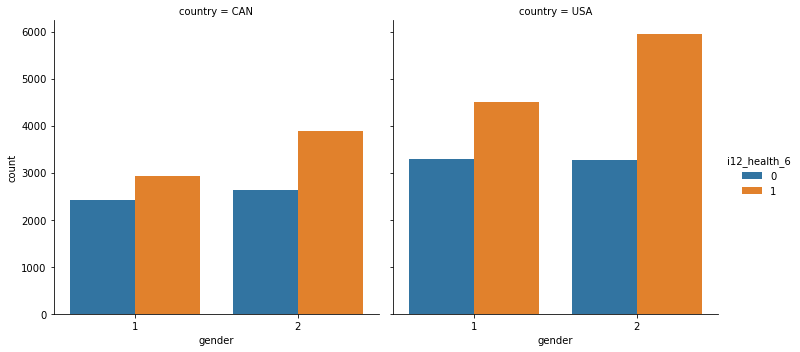

In [23]:
ax = sns.catplot(x="gender", hue="i12_health_6", col="country", data=df_new, kind="count", ci=None)

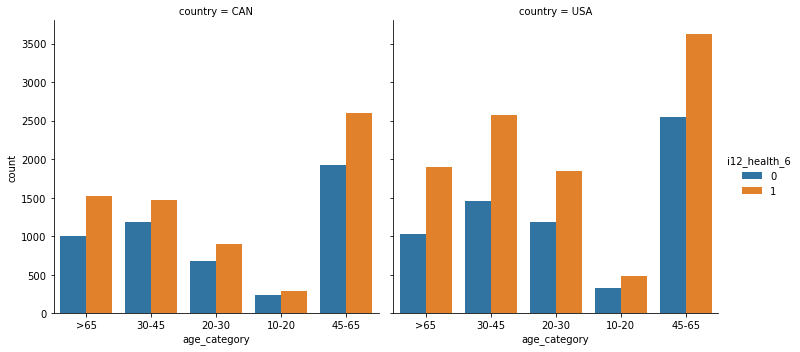

In [24]:
ax = sns.catplot(x="age_category", hue="i12_health_6", col="country", data=df_new, kind="count", ci=None)

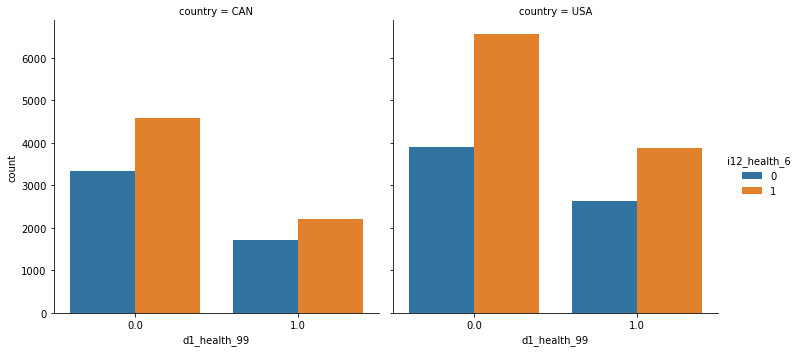

In [25]:
ax = sns.catplot(x="d1_health_99", hue="i12_health_6", col="country", data=df_new, kind="count", ci=None)

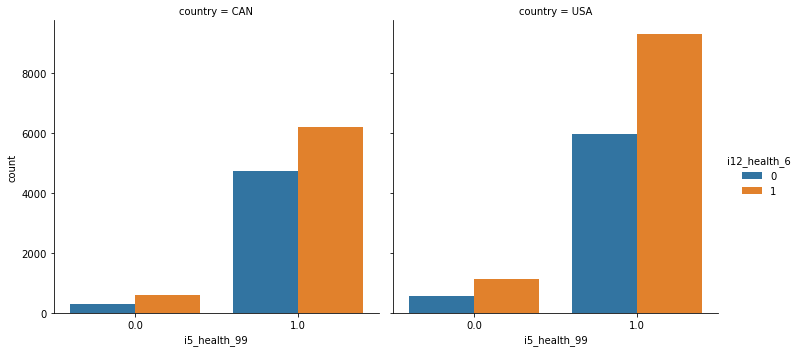

In [26]:
ax = sns.catplot(x="i5_health_99", hue="i12_health_6", col="country", data=df_new, kind="count", ci=None)

In [27]:
# Model

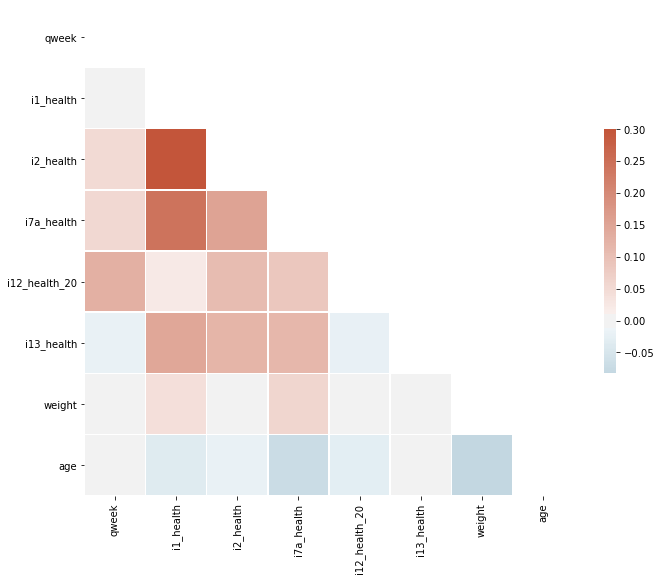

In [28]:
# Compute the correlation matrix for the dataset
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
# Select preiditor variables that will be included in the model
df_feats= df[['i1_health', 'i2_health', 'i7a_health', 'i3_health', 'i4_health', 'i5_health_99', 'i9_health',
              'i10_health', 'i11_health', 'i12_health_1', 'i12_health_2', 'i12_health_3', 'i12_health_4', 
              'i12_health_5', 'i12_health_7', 'i12_health_8', 'i12_health_11', 'i12_health_12', 'i12_health_13', 
              'i12_health_14', 'i12_health_15', 'i12_health_16', 'i12_health_17', 'i12_health_18', 'i12_health_19', 
              'i12_health_20', 'i13_health', 'd1_health_98', 'd1_health_99', 'weight', 'gender', 'age',  
              'household_size', 'household_children', 'employment_status', 'i12_health_6']]

In [30]:
# Check if missing values are all handled
df_feats.isnull().sum()

i1_health             0
i2_health             0
i7a_health            0
i3_health             0
i4_health             0
i5_health_99          0
i9_health             0
i10_health            0
i11_health            0
i12_health_1          0
i12_health_2          0
i12_health_3          0
i12_health_4          0
i12_health_5          0
i12_health_7          0
i12_health_8          0
i12_health_11         0
i12_health_12         0
i12_health_13         0
i12_health_14         0
i12_health_15         0
i12_health_16         0
i12_health_17         0
i12_health_18         0
i12_health_19         0
i12_health_20         0
i13_health            0
d1_health_98          0
d1_health_99          0
weight                0
gender                0
age                   0
household_size        0
household_children    0
employment_status     0
i12_health_6          0
dtype: int64

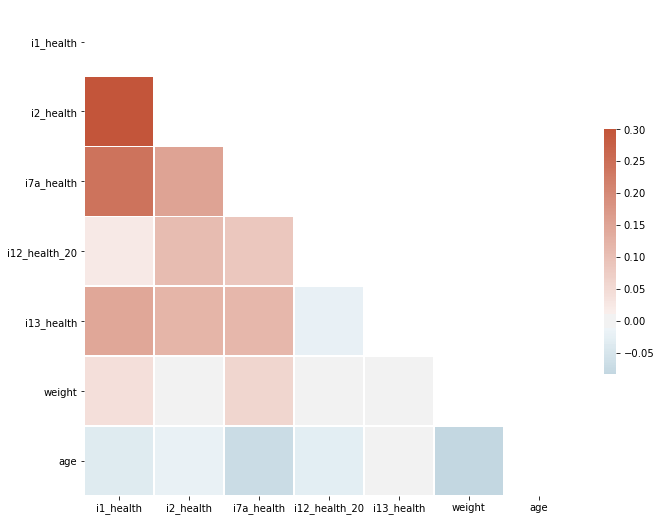

In [31]:
# Compute the correlation matrix for the columns selected as preiditor variables
corr = df_feats.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
# Define x and y for the model
x = df_feats.drop(["i12_health_6"], axis=1)
y = df_feats["i12_health_6"]

In [33]:
# split off test data - 1/4 of the data for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [34]:
# Define the for importance of features selected
model_importance = DecisionTreeClassifier()

In [35]:
# Fit the model
model_importance.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
# Get importance information and summarize
importance = model_importance.feature_importances_

print('Total Importance: ' +  str(sum(importance)))

graph = []
graph2 = []
for i in range (35):
    graph.append(X_train.columns[i])
    graph2.append(importance[i])
    print('Feature ' + str(i) + ' ' + X_train.columns[i] + " with score:" + str(round(importance[i],5)))

Total Importance: 1.0000000000000002
Feature 0 i1_health with score:0.01892
Feature 1 i2_health with score:0.03597
Feature 2 i7a_health with score:0.03039
Feature 3 i3_health with score:0.00604
Feature 4 i4_health with score:0.00872
Feature 5 i5_health_99 with score:0.00327
Feature 6 i9_health with score:0.01032
Feature 7 i10_health with score:0.02114
Feature 8 i11_health with score:0.01508
Feature 9 i12_health_1 with score:0.01801
Feature 10 i12_health_2 with score:0.00754
Feature 11 i12_health_3 with score:0.01576
Feature 12 i12_health_4 with score:0.00856
Feature 13 i12_health_5 with score:0.00945
Feature 14 i12_health_7 with score:0.0143
Feature 15 i12_health_8 with score:0.01284
Feature 16 i12_health_11 with score:0.02271
Feature 17 i12_health_12 with score:0.06475
Feature 18 i12_health_13 with score:0.0144
Feature 19 i12_health_14 with score:0.00937
Feature 20 i12_health_15 with score:0.02024
Feature 21 i12_health_16 with score:0.33848
Feature 22 i12_health_17 with score:0.01444


<BarContainer object of 35 artists>

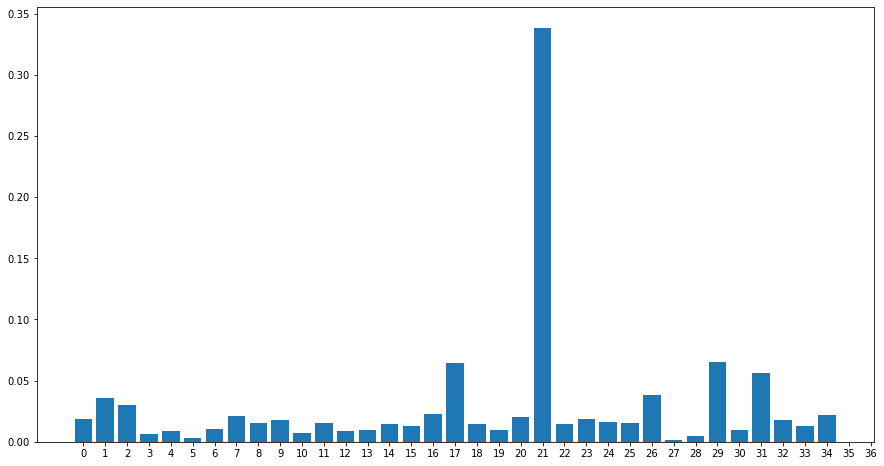

In [37]:
# Plot importance for each features selected
plt.figure(figsize=(15, 8))
plt.xticks(np.arange(0, 55, 1.0))
pyplot.bar([x for x in range(len(importance))], importance)

In [38]:
# How many folds for cross validation
num_folds = 10
# scoring
scoring = "accuracy"

In [39]:
# Define KNN Model
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=101)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

In [40]:
msg = 'KNN: %f (%f)' % (cv_results.mean(), cv_results.std())
print(msg)

KNN: 0.768849 (0.009819)


In [41]:
# Tuning the Model
k_values = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
param_grid = dict(n_neighbors=k_values)

# Define the grid search cross validation method
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

# Generate the results of the grid search cross validation method
grid_result=grid.fit(X_train,y_train)

# Print the best score achieved by any of the specified k_values
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.781755 using {'n_neighbors': 19}


In [42]:
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]


for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %s' %(mean, stdev, param))

0.727496 (0.006810) with: {'n_neighbors': 1}
0.759413 (0.008629) with: {'n_neighbors': 3}
0.768849 (0.009819) with: {'n_neighbors': 5}
0.775557 (0.009199) with: {'n_neighbors': 7}
0.776852 (0.012033) with: {'n_neighbors': 9}
0.779998 (0.009210) with: {'n_neighbors': 11}
0.779489 (0.008994) with: {'n_neighbors': 13}
0.781201 (0.008515) with: {'n_neighbors': 15}
0.780738 (0.010002) with: {'n_neighbors': 17}
0.781755 (0.008617) with: {'n_neighbors': 19}
0.781663 (0.009893) with: {'n_neighbors': 21}


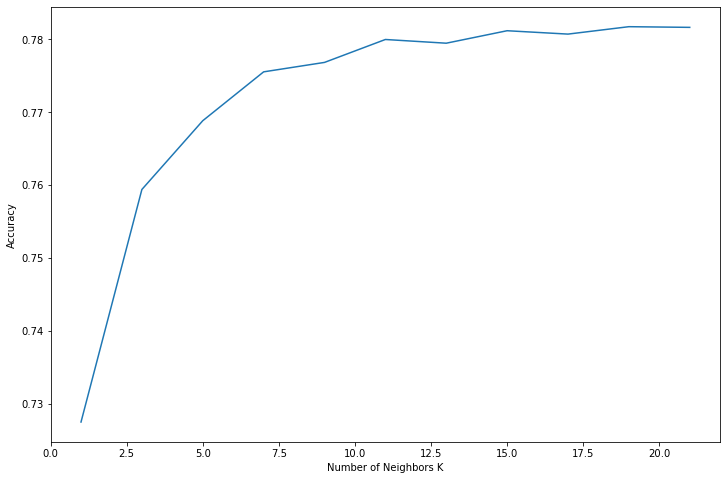

In [43]:
# Plot the accuracy level at different K
plt.figure(figsize=(12,8))
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Accuracy")
plt.savefig('AccuracyChart.png')

In [44]:
# Final Model chosen k=19
model = KNeighborsClassifier(n_neighbors=19)

In [45]:
# Fit the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [46]:
# Classification matrix for the test data that results from using the best model parameters. 
pred = model.predict(X_test)
pred2 = model.predict(X_train)

print("predict on test dataset")
print(confusion_matrix(y_test, pred))
print("predict on trainig dataset")
print(confusion_matrix(y_train, pred2))

print("report on test dataset")
print(classification_report(y_test, pred))
print("report on training dataset")
print(classification_report(y_train, pred2))

predict on test dataset
[[1777 1106]
 [ 437 3887]]
predict on trainig dataset
[[ 5500  3205]
 [ 1192 11721]]
report on test dataset
              precision    recall  f1-score   support

           0       0.80      0.62      0.70      2883
           1       0.78      0.90      0.83      4324

    accuracy                           0.79      7207
   macro avg       0.79      0.76      0.77      7207
weighted avg       0.79      0.79      0.78      7207

report on training dataset
              precision    recall  f1-score   support

           0       0.82      0.63      0.71      8705
           1       0.79      0.91      0.84     12913

    accuracy                           0.80     21618
   macro avg       0.80      0.77      0.78     21618
weighted avg       0.80      0.80      0.79     21618

